In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal,ogr,osr
from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd
from osgeo import gdal,ogr,osr
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

In [2]:
df_spectral = pd.read_csv(r"F:\wenqu\Aviris\2022\csv_file\site1b_aviris_band_data.csv")
df_spectral

,filename,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_416,band_417,band_418,band_419,band_420,band_421,band_422,band_423,band_424,band_425
0,site1b_100_37.tif,0.071732,0.071895,0.065611,0.060531,0.051268,0.046659,0.041363,0.038171,0.037827,...,0.039371,0.043866,0.039761,0.046832,0.036433,0.058568,0.237594,0.476767,0.225404,0.148968
1,site1b_100_38.tif,0.081982,0.075344,0.067857,0.059986,0.053019,0.046804,0.041438,0.041451,0.037904,...,0.049093,0.044013,0.054910,0.058394,0.074277,0.095487,0.307530,0.682490,0.553884,0.207413
2,site1b_100_39.tif,0.076036,0.067177,0.063094,0.060783,0.051599,0.044855,0.041522,0.039389,0.038311,...,0.042581,0.046027,0.043444,0.049309,0.020821,0.077721,0.206933,0.460719,0.528558,0.084599
3,site1b_100_40.tif,0.079165,0.080077,0.068620,0.059282,0.053085,0.048303,0.043379,0.041101,0.038067,...,0.049689,0.050923,0.041765,0.063461,0.074859,0.154978,0.450667,0.527893,0.417781,0.219619
4,site1b_100_41.tif,0.078255,0.072682,0.064213,0.057075,0.050908,0.046678,0.042505,0.038895,0.039216,...,0.046199,0.045331,0.041867,0.047925,0.051499,0.044865,0.264222,0.538805,0.433586,0.126596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,site1b_99_85.tif,0.086831,0.081339,0.068299,0.065706,0.055802,0.049966,0.045295,0.042461,0.040240,...,0.049071,0.044742,0.051512,0.054948,0.061950,0.171341,0.297418,0.733261,0.628075,0.254785
3210,site1b_99_88.tif,0.081682,0.073824,0.067409,0.061002,0.054301,0.048736,0.044374,0.041829,0.039925,...,0.048339,0.050937,0.042812,0.055779,0.056056,0.098353,0.146507,0.591416,0.360144,0.095048
3211,site1b_99_89.tif,0.093328,0.074008,0.071157,0.063508,0.055818,0.049667,0.044238,0.042785,0.041531,...,0.047763,0.049601,0.050649,0.073992,0.082002,0.099814,0.327502,0.520933,0.480196,0.216027
3212,site1b_99_90.tif,0.071417,0.069396,0.068991,0.060479,0.053601,0.049769,0.044767,0.042216,0.039653,...,0.049898,0.051365,0.045771,0.046246,0.056982,0.091308,0.109901,0.416848,0.062627,0.136468


In [3]:
band_name = []
for i in range(16, 186):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

for i in range(216, 286):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)
    
for i in range(326, 405):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

In [4]:
len(band_name)

319

In [5]:
x_spectra = df_spectral[band_name]
x = x_spectra.to_numpy()

In [6]:
x.shape

(3214, 319)

In [7]:
# Define Gaussian function
def gaussian(x, mean, sigma):
    return (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-(x-mean)**2/(2*sigma**2))

In [8]:
la_trait_pdf = []
for file_name in df_spectral['filename']:
    print(file_name)
    file_name = 'F:/wenqu/Aviris/2022/trait_map/site1b_d15n/'  + file_name
    x_data = gdal.Open(file_name).ReadAsArray()
    x_data = x_data.flatten()
    
    hist, bin_edges = np.histogram(x_data)
    hist=hist/sum(hist)
    n = len(hist)
    x_hist=np.zeros((n),dtype=float) 
    # middle value for each bin, has the same shape as y_hist
    for ii in range(n):
        x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2
    # number of values falling into each bins - probability     
    y_hist=hist
    mean = sum(x_hist*y_hist)/sum(y_hist)                  
    sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist)
#     p0=[max(y_hist)]

#     p0=[max(y_hist),mean,sigma]



    la_trait_pdf.append(mean)


site1b_100_37.tif
site1b_100_38.tif
site1b_100_39.tif
site1b_100_40.tif
site1b_100_41.tif
site1b_100_42.tif
site1b_100_43.tif
site1b_100_44.tif
site1b_100_45.tif
site1b_100_46.tif
site1b_100_48.tif
site1b_100_49.tif
site1b_100_50.tif
site1b_100_51.tif
site1b_100_52.tif
site1b_100_53.tif
site1b_100_54.tif
site1b_100_55.tif
site1b_100_59.tif
site1b_100_60.tif
site1b_100_61.tif
site1b_100_62.tif
site1b_100_63.tif
site1b_100_64.tif
site1b_100_65.tif
site1b_100_69.tif
site1b_100_70.tif
site1b_100_71.tif
site1b_100_72.tif
site1b_100_73.tif
site1b_100_74.tif
site1b_100_75.tif
site1b_100_79.tif
site1b_100_80.tif
site1b_100_81.tif
site1b_100_82.tif
site1b_100_83.tif
site1b_100_84.tif
site1b_100_85.tif
site1b_100_89.tif
site1b_100_90.tif
site1b_100_91.tif
site1b_100_92.tif
site1b_101_38.tif
site1b_101_39.tif
site1b_101_40.tif
site1b_101_41.tif
site1b_101_42.tif
site1b_101_43.tif
site1b_101_44.tif
site1b_101_45.tif
site1b_101_46.tif
site1b_101_49.tif
site1b_101_50.tif
site1b_101_51.tif
site1b_101

site1b_21_31.tif
site1b_21_32.tif
site1b_21_33.tif
site1b_21_34.tif
site1b_21_35.tif
site1b_21_36.tif
site1b_21_39.tif
site1b_21_40.tif
site1b_21_41.tif
site1b_21_42.tif
site1b_21_43.tif
site1b_21_44.tif
site1b_21_45.tif
site1b_21_9.tif
site1b_22_10.tif
site1b_22_11.tif
site1b_22_12.tif
site1b_22_13.tif
site1b_22_14.tif
site1b_22_15.tif
site1b_22_16.tif
site1b_22_17.tif
site1b_22_18.tif
site1b_22_23.tif
site1b_22_24.tif
site1b_22_25.tif
site1b_22_26.tif
site1b_22_27.tif
site1b_22_28.tif
site1b_22_30.tif
site1b_22_31.tif
site1b_22_32.tif
site1b_22_33.tif
site1b_22_34.tif
site1b_22_35.tif
site1b_22_36.tif
site1b_22_39.tif
site1b_22_40.tif
site1b_22_41.tif
site1b_22_42.tif
site1b_22_43.tif
site1b_22_44.tif
site1b_22_45.tif
site1b_22_8.tif
site1b_22_9.tif
site1b_23_10.tif
site1b_23_13.tif
site1b_23_14.tif
site1b_23_15.tif
site1b_23_16.tif
site1b_23_17.tif
site1b_23_18.tif
site1b_23_19.tif
site1b_23_22.tif
site1b_23_23.tif
site1b_23_24.tif
site1b_23_25.tif
site1b_23_26.tif
site1b_23_27.tif


site1b_36_51.tif
site1b_36_52.tif
site1b_36_53.tif
site1b_37_10.tif
site1b_37_11.tif
site1b_37_12.tif
site1b_37_13.tif
site1b_37_14.tif
site1b_37_15.tif
site1b_37_16.tif
site1b_37_17.tif
site1b_37_20.tif
site1b_37_21.tif
site1b_37_22.tif
site1b_37_23.tif
site1b_37_24.tif
site1b_37_25.tif
site1b_37_26.tif
site1b_37_29.tif
site1b_37_30.tif
site1b_37_31.tif
site1b_37_32.tif
site1b_37_33.tif
site1b_37_34.tif
site1b_37_35.tif
site1b_37_38.tif
site1b_37_39.tif
site1b_37_40.tif
site1b_37_41.tif
site1b_37_42.tif
site1b_37_43.tif
site1b_37_44.tif
site1b_37_47.tif
site1b_37_48.tif
site1b_37_49.tif
site1b_37_50.tif
site1b_37_51.tif
site1b_37_52.tif
site1b_37_53.tif
site1b_38_11.tif
site1b_38_12.tif
site1b_38_13.tif
site1b_38_14.tif
site1b_38_15.tif
site1b_38_16.tif
site1b_38_17.tif
site1b_38_18.tif
site1b_38_20.tif
site1b_38_21.tif
site1b_38_22.tif
site1b_38_23.tif
site1b_38_24.tif
site1b_38_25.tif
site1b_38_26.tif
site1b_38_27.tif
site1b_38_29.tif
site1b_38_30.tif
site1b_38_31.tif
site1b_38_32.t

site1b_52_20.tif
site1b_52_21.tif
site1b_52_22.tif
site1b_52_23.tif
site1b_52_24.tif
site1b_52_25.tif
site1b_52_28.tif
site1b_52_29.tif
site1b_52_30.tif
site1b_52_31.tif
site1b_52_32.tif
site1b_52_33.tif
site1b_52_37.tif
site1b_52_38.tif
site1b_52_39.tif
site1b_52_40.tif
site1b_52_41.tif
site1b_52_42.tif
site1b_52_46.tif
site1b_52_47.tif
site1b_52_48.tif
site1b_52_49.tif
site1b_52_50.tif
site1b_52_51.tif
site1b_52_52.tif
site1b_52_55.tif
site1b_52_56.tif
site1b_52_57.tif
site1b_52_58.tif
site1b_52_59.tif
site1b_52_60.tif
site1b_53_16.tif
site1b_53_19.tif
site1b_53_20.tif
site1b_53_21.tif
site1b_53_22.tif
site1b_53_23.tif
site1b_53_24.tif
site1b_53_25.tif
site1b_53_28.tif
site1b_53_29.tif
site1b_53_30.tif
site1b_53_31.tif
site1b_53_32.tif
site1b_53_33.tif
site1b_53_34.tif
site1b_53_37.tif
site1b_53_38.tif
site1b_53_39.tif
site1b_53_40.tif
site1b_53_41.tif
site1b_53_42.tif
site1b_53_43.tif
site1b_53_46.tif
site1b_53_47.tif
site1b_53_48.tif
site1b_53_49.tif
site1b_53_50.tif
site1b_53_51.t

site1b_72_43.tif
site1b_72_46.tif
site1b_72_47.tif
site1b_72_48.tif
site1b_72_49.tif
site1b_72_50.tif
site1b_72_51.tif
site1b_72_52.tif
site1b_72_53.tif
site1b_72_56.tif
site1b_72_57.tif
site1b_72_58.tif
site1b_72_59.tif
site1b_72_60.tif
site1b_72_61.tif
site1b_72_62.tif
site1b_72_63.tif
site1b_72_64.tif
site1b_73_31.tif
site1b_73_32.tif
site1b_73_33.tif
site1b_73_34.tif
site1b_73_40.tif
site1b_73_41.tif
site1b_73_42.tif
site1b_73_43.tif
site1b_73_44.tif
site1b_73_47.tif
site1b_73_48.tif
site1b_73_49.tif
site1b_73_50.tif
site1b_73_51.tif
site1b_73_52.tif
site1b_73_53.tif
site1b_73_54.tif
site1b_73_57.tif
site1b_73_58.tif
site1b_73_59.tif
site1b_73_60.tif
site1b_73_61.tif
site1b_73_62.tif
site1b_73_63.tif
site1b_73_64.tif
site1b_74_31.tif
site1b_74_32.tif
site1b_74_33.tif
site1b_74_34.tif
site1b_74_35.tif
site1b_74_40.tif
site1b_74_41.tif
site1b_74_42.tif
site1b_74_43.tif
site1b_74_44.tif
site1b_74_45.tif
site1b_74_48.tif
site1b_74_49.tif
site1b_74_50.tif
site1b_74_51.tif
site1b_74_52.t

site1b_86_34.tif
site1b_86_36.tif
site1b_86_37.tif
site1b_86_38.tif
site1b_86_39.tif
site1b_86_40.tif
site1b_86_41.tif
site1b_86_42.tif
site1b_86_43.tif
site1b_86_44.tif
site1b_86_48.tif
site1b_86_49.tif
site1b_86_50.tif
site1b_86_51.tif
site1b_86_52.tif
site1b_86_53.tif
site1b_86_54.tif
site1b_86_57.tif
site1b_86_58.tif
site1b_86_59.tif
site1b_86_60.tif
site1b_86_61.tif
site1b_86_62.tif
site1b_86_63.tif
site1b_86_64.tif
site1b_86_68.tif
site1b_86_69.tif
site1b_86_70.tif
site1b_86_71.tif
site1b_86_72.tif
site1b_86_73.tif
site1b_86_74.tif
site1b_86_75.tif
site1b_86_76.tif
site1b_86_77.tif
site1b_86_81.tif
site1b_86_82.tif
site1b_86_83.tif
site1b_86_84.tif
site1b_86_85.tif
site1b_87_31.tif
site1b_87_32.tif
site1b_87_33.tif
site1b_87_34.tif
site1b_87_35.tif
site1b_87_37.tif
site1b_87_38.tif
site1b_87_39.tif
site1b_87_40.tif
site1b_87_41.tif
site1b_87_42.tif
site1b_87_43.tif
site1b_87_44.tif
site1b_87_45.tif
site1b_87_48.tif
site1b_87_49.tif
site1b_87_50.tif
site1b_87_51.tif
site1b_87_52.t

site1b_96_72.tif
site1b_96_76.tif
site1b_96_77.tif
site1b_96_78.tif
site1b_96_79.tif
site1b_96_80.tif
site1b_96_81.tif
site1b_96_82.tif
site1b_96_86.tif
site1b_96_87.tif
site1b_96_88.tif
site1b_96_89.tif
site1b_96_90.tif
site1b_96_91.tif
site1b_96_92.tif
site1b_96_93.tif
site1b_97_35.tif
site1b_97_36.tif
site1b_97_37.tif
site1b_97_38.tif
site1b_97_39.tif
site1b_97_40.tif
site1b_97_41.tif
site1b_97_42.tif
site1b_97_43.tif
site1b_97_45.tif
site1b_97_46.tif
site1b_97_47.tif
site1b_97_48.tif
site1b_97_49.tif
site1b_97_50.tif
site1b_97_51.tif
site1b_97_52.tif
site1b_97_53.tif
site1b_97_57.tif
site1b_97_58.tif
site1b_97_59.tif
site1b_97_60.tif
site1b_97_61.tif
site1b_97_62.tif
site1b_97_63.tif
site1b_97_66.tif
site1b_97_67.tif
site1b_97_68.tif
site1b_97_69.tif
site1b_97_70.tif
site1b_97_71.tif
site1b_97_72.tif
site1b_97_73.tif
site1b_97_77.tif
site1b_97_78.tif
site1b_97_79.tif
site1b_97_80.tif
site1b_97_81.tif
site1b_97_82.tif
site1b_97_83.tif
site1b_97_86.tif
site1b_97_87.tif
site1b_97_88.t

In [9]:
la_trait_pdf

[0.07122805442969346,
 0.138978126553382,
 0.11615573395498582,
 0.12327863295039063,
 0.12667342560199715,
 0.12617270364958996,
 0.12160667211784713,
 0.14091946900902658,
 0.11903220379934389,
 0.0969821028136871,
 0.10585707322498145,
 0.10314936616994513,
 0.08814418522353136,
 0.10823669327800853,
 0.09964190768162422,
 0.14064594742277223,
 0.1236710149053778,
 0.12526699273793584,
 0.12180444935340307,
 0.10134876480494921,
 0.09869615634348841,
 0.11061474207761254,
 0.13889946449180063,
 0.09500966770020454,
 0.0925479602782962,
 0.0772708735762147,
 0.07261450477215009,
 0.08707132429391139,
 0.07542757506041908,
 0.150029300723184,
 0.09486289001309377,
 0.10692567747156616,
 0.06597840510481681,
 0.07421923692579716,
 0.07239347332351034,
 0.08171226286184693,
 0.08650837841592705,
 0.12604503112388116,
 0.06929407962524631,
 0.07457510107743826,
 0.04996918961442937,
 0.01682166593467452,
 0.038416833826894016,
 0.1356333149126131,
 0.13452961088135384,
 0.140747508952950

In [10]:
y = la_trait_pdf
y = np.array(y)


In [11]:
y.shape

(3214,)

In [12]:
print(y.dtype)

float64


In [13]:
y.shape, x.shape

((3214,), (3214, 319))

In [14]:
band_name = np.array(band_name)

In [15]:
# Python
def pls_variable_selection(X, y, max_comp):
    
    # Define MSE array to be populated
    mse = np.zeros((max_comp,X.shape[1]))
 
    # Loop over the number of PLS components
    for i in range(max_comp):
        
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1)
        pls1.fit(X, y)
        
        # Indices of sort spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_[:,0]))
 
        # Sort spectra accordingly 
        Xc = X[:,sorted_ind]
 
        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(Xc.shape[1]-(i+1)):
 
            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc[:, j:], y)
            
            y_cv = cross_val_predict(pls2, Xc[:, j:], y, cv=5)
 
            mse[i,j] = mean_squared_error(y, y_cv)
    
        comp = 100*(i+1)/(max_comp)
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # # Calculate and print the position of minimum in MSE
    mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))
 
    print("Optimised number of PLS components: ", mseminx[0]+1)
    print("Wavelengths to be discarded ",mseminy[0])
    print('Optimised MSEP ', mse[mseminx,mseminy][0])
    stdout.write("\n")
    # plt.imshow(mse, interpolation=None)
    # plt.show()
 
 
    # Calculate PLS with optimal components and export values
    pls = PLSRegression(n_components=mseminx[0]+1)
    pls.fit(X, y)
        
    sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))
 
    Xc = X[:,sorted_ind]
 
    return(Xc[:,mseminy[0]:],mseminx[0]+1,mseminy[0], sorted_ind)

In [16]:
def simple_pls_cv(X, y, n_comp):
    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_c = pls.predict(X)
 
    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)    
 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
 
    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
 
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
        # Plot regression 
 
    z = np.polyfit(y, y_cv, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_cv, y, c='red', edgecolors='k')
        ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        
        plt.show()

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


3% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


13% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


23% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


33% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


43% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


53% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


63% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


73% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


83% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


93% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  9
Wavelengths to be discarded  264
Optimised MSEP  0.0012094176384156983

R2 calib: 0.428
R2 CV: 0.377
MSE calib: 0.001
MSE CV: 0.001


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


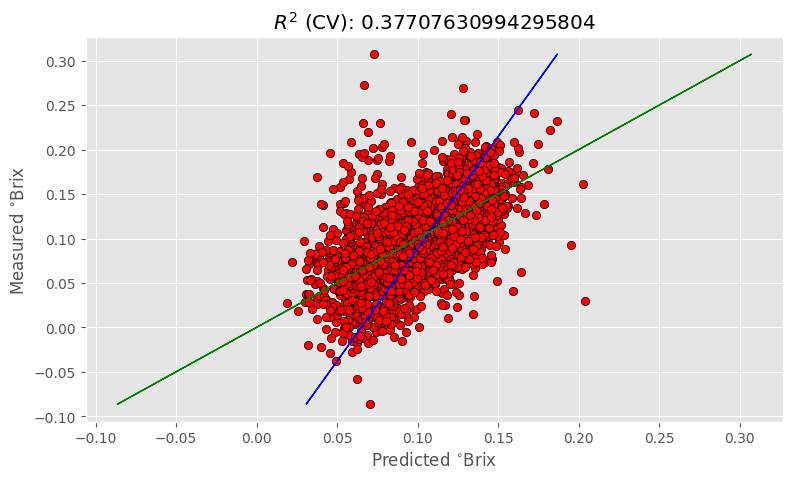

In [17]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x, y, 30)
simple_pls_cv(opt_Xc, y, ncomp)